In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import time
import bacteria_numba_no_saturation as bacnosat
import bacteria_numba as bacsat
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [16]:
r = 0.69 # h⁻¹
k = 0.1
chi = 315/3600 # μm²/h
gamma = r/k
lambd = 1.25 # mM/OD600*h
q = 1 # μM/h
beta = 1

D_b = 50.2/3600 # μm²/h
D_s = 800/3600 # μm²/h
#D_s = 1e-1
t_c = 100
t_max = 300000#*(t_c/128)
dt_size = 128
x_max = 10
x_L = 5
dx = 0.1
n = 100
S_plus = 30 # μM
S_minus = 1 # μM
S_max = 1 # μM

In [17]:
# Initial condition
S = np.zeros(n)
rho = rho = np.random.uniform(0.1, 0.1, n)

In [18]:
test = bacsat.solve_model(5, rho, S, 0, 5, n, D_s, D_b, chi, r, k, lambd, 1, 5, 0.6, beta, S_plus, S_minus, S_max, 32)
test = bacnosat.solve_model(5, rho, S, 0, 5, n, D_s, D_b, chi, r, k, lambd, 1, 5, 0.6, beta, 32)

Still computing... step: 0
Still computing... step: 0


In [19]:
del test

100%|██████████| 2/2 [00:09<00:00,  4.95s/it]


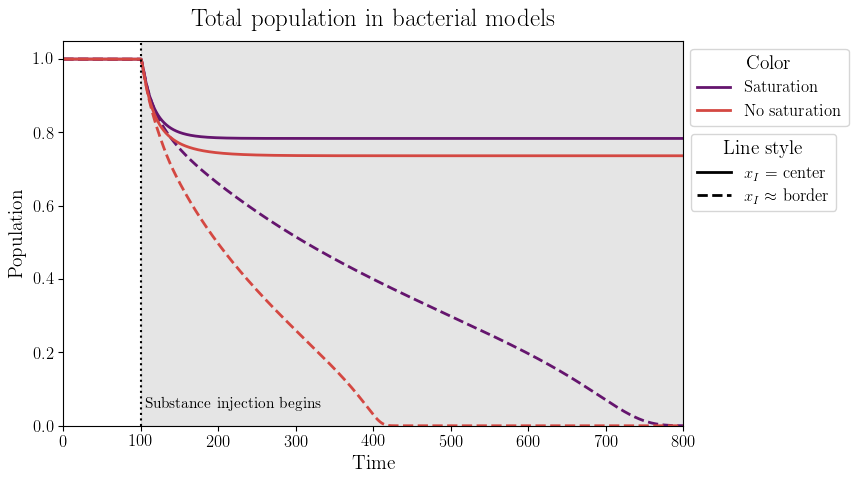

In [34]:
fig, ax = plt.subplots(figsize = (8,5))

styles = ['dashed', 'solid']
for i in tqdm(range(2)):
    x_L = 1 + 4*i
    
    rhos_sat, Ss_sat, tot_rho_sat, tot_S_sat, idx_sat, dx_sat, dt_sat, x_sat = bacsat.solve_model(t_max, rho, S, 0,
                                                        x_max, n, D_s, D_b, chi,
                                                        r, k, lambd, t_c, x_L,
                                                        q, beta, S_plus, S_minus, S_max, dt_size, automatic_stop = False, print_progress = False)
    
    rhos_nosat, Ss_nosat, tot_rho_nosat, tot_S_nosat, idx_nosat, dx_nosat, dt_nosat, x_nosat = bacnosat.solve_model(t_max, rho, S, 0,
                                                        x_max, n, D_s, D_b, chi,
                                                        r, k, lambd, t_c, x_L,
                                                        q, beta, dt_size, automatic_stop = False, print_progress = False)
    
    plt.plot([i*dt_sat for i in range(idx_sat+2)], tot_rho_sat, lw = 2,
            color = sns.color_palette('inferno')[1], ls = styles[i])
    plt.plot([i*dt_nosat for i in range(idx_nosat+2)], tot_rho_nosat, lw = 2,
            color = sns.color_palette('inferno')[3], ls = styles[i])

    
plt.xlim(0, 800)
plt.ylim(0, 1.05)
plt.ylabel('Population', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xlabel('Time', fontsize = 14)
plt.xticks(fontsize = 12)
plt.axvline(t_c, ls = 'dotted', color = 'black', zorder = 4)
plt.fill_between([t_c, 800], 0, 1.05, color = 'grey', alpha = 0.2)
color1, = plt.plot([2000,2100], [2,3], lw = 2, color = sns.color_palette('inferno')[1], label = 'Saturation')
color2, = plt.plot([2000,2100], [2,3], lw = 2, color = sns.color_palette('inferno')[3], label = 'No saturation')
styles1, = plt.plot([2000,2100], [2,3], lw = 2, color = 'black', label = 'Injection point in the center')
styles2, = plt.plot([2000,2100], [2,3], lw = 2, color = 'black', label = 'Injection point at the border', ls = '--')
legend1 = plt.legend(title = 'Color', handles = [color1, color2], labels = ["Saturation", "No saturation"],
                     fontsize = 12, bbox_to_anchor = (1.28,1), loc = 'upper right')
lgd = plt.legend(title = 'Line style', handles = [styles1, styles2],
           labels = [r'$x_I$ = center',r'$x_I \approx$ border'],
           fontsize = 12, bbox_to_anchor = (1.26,0.78), loc = 'upper right')
plt.gca().add_artist(legend1)
legend1.get_title().set_fontsize(14)
lgd.get_title().set_fontsize(14)

plt.text(t_c+5, 0.05, 'Substance injection begins', fontsize = 11)
plt.title('Total population in bacterial models', fontsize = 18, pad = 10)

plt.savefig('Plots/Saturation_effect_compare.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('Plots/Saturation_effect_compare.svg', dpi = 300, bbox_inches = 'tight')
plt.show()